In [1]:
# let's pull the table from here : https://www.worldometers.info/world-population/population-by-country
from bs4 import BeautifulSoup as bs
import requests as rq
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://www.worldometers.info/world-population/population-by-country'
page = rq.get(url)
page
page.encoding = "utf-8" # to pull the data in the right way as it is on the website 

In [3]:
page # Response [200], success

<Response [200]>

In [4]:
soup = bs(page.text, 'html.parser') # you pull all the text and you want it in an html 
print(soup.prettify()[:1000]) # it's to not show the whole output, it's LONG

<!DOCTYPE html>
<html dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   Population by Country (2025) - Worldometer
  </title>
  <!-- <I18nTags /> -->
  <script async="" src="https://www.googletagmanager.com/gtag/js?id=G-ZDP3BFSX60">
  </script>
  <script>
   window.dataLayer = window.dataLayer || [];
    function gtag() {
      // eslint-disable-next-line prefer-rest-params
      dataLayer.push(arguments);
    }
    gtag("js", new Date());
    gtag("config", "G-ZDP3BFSX60", {
      page_lang: document.documentElement.lang,
    });
  </script>
  <script crossorigin="anonymous" src="https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js?client=ca-pub-3701697624350410">
  </script>
  <script async="" src="https://securepubads.g.doubleclick.net/tag/js/gpt.js">
  </script>
  <link crossorigin="" href="https://a.pub.network/" rel="preconne

In [7]:
table = soup.find('table', class_ = 'datatable w-full border border-zinc-200') #, class_ ="datatable w-full border border-zinc-200 datatable-table" ) # the information i'm interested in is contained in the table tag of the html
table
print(table.prettify()[:1000])

<table class="datatable w-full border border-zinc-200" data-locale="en" data-options='{"searchable":true,"sortable":true,"defaultSort":"#","pageSize":false}' data-sort-col="0" data-sort-dir="asc">
 <thead>
  <tr>
   <th class="px-2 border-e border-zinc-200 align-middle text-center font-semibold border-b-3 py-1" data-sortable="true">
    <span>
     #
    </span>
    <svg aria-hidden="true" class="size-4 shrink-0" data-sorting-icon="true" fill="none" viewbox="0 0 24 24" xmlns="http://www.w3.org/2000/svg">
     <path d="m8 15 4 4 4-4m0-6-4-4-4 4" stroke="currentColor" stroke-linecap="round" stroke-linejoin="round" stroke-width="2">
     </path>
    </svg>
   </th>
   <th class="px-2 border-e border-zinc-200 align-middle text-center font-semibold border-b-3 py-1" data-sortable="true">
    <span>
     Country (or dependency)
    </span>
    <svg aria-hidden="true" class="size-4 shrink-0" data-sorting-icon="true" fill="none" viewbox="0 0 24 24" xmlns="http://www.w3.org/2000/svg">
     <path

In [8]:
columns = table.find_all('th') # find_all outputs a list
col_names = [col.text.strip() for col in columns]
col_names

['#',
 'Country (or dependency)',
 'Population 2025',
 'Yearly Change',
 'Net Change',
 'Density (P/Km²)',
 'Land Area (Km²)',
 'Migrants (net)',
 'Fert. Rate',
 'Median Age',
 'Urban Pop %',
 'World Share']

In [9]:
table2 = table.find('tbody').find_all('tr') # the tag 'tr' inside the outer tag 'tbody' contains the values of the columns
table2[0]#table 2 is a list (output of find_all)

<tr id="india"> <td class="px-2 border-e border-zinc-200 py-1.5 border-b text-start"> 1 </td><td class="px-2 border-e border-zinc-200 py-1.5 border-b font-bold text-start"> <a class="transition-all duration-200 text-lime-600 hover:text-lime-500" data-country="india" href="/world-population/india-population/">India</a> </td><td class="px-2 border-e border-zinc-200 text-end py-1.5 border-b font-bold" data-order="1463865525" dir="ltr"> 1,463,865,525 </td><td class="px-2 border-e border-zinc-200 text-end py-1.5 border-b" data-order="89" dir="ltr"> 0.89% </td><td class="px-2 border-e border-zinc-200 text-end py-1.5 border-b" data-order="12929734" dir="ltr"> 12,929,734 </td><td class="px-2 border-e border-zinc-200 text-end py-1.5 border-b" data-order="492.35518920755146" dir="ltr"> 492 </td><td class="px-2 border-e border-zinc-200 text-end py-1.5 border-b" data-order="2973190" dir="ltr"> 2,973,190 </td><td class="px-2 border-e border-zinc-200 text-end py-1.5 border-b" data-order="-495753" di

In [11]:
table2[0].text.split() #the split was needed because .text was treating everything in 

['1',
 'India',
 '1,463,865,525',
 '0.89%',
 '12,929,734',
 '492',
 '2,973,190',
 '−495,753',
 '1.94',
 '28.8',
 '37.1%',
 '17.78%']

In [8]:
# the problem is i'm using 'split()' to split based on the space between the values
 # but for countries like 'united states' it will consider 'united' and 'states' as seperate values
  # so i gotta find a better solution

In [12]:
# Inside the 'tr' tag which represents an entire row, each individual value has a 'td' tag, so we will exploit that

table3 = table.find_all('td') # this outputs a list

table3[0].text.strip() # the first td tag is for the first row index, to get the whole rows we have to select from 0 to 12 which the number of cols

'1'

In [13]:
# first row: 
[value.text.strip() for value in table3[0:12]]



['1',
 'India',
 '1,463,865,525',
 '0.89%',
 '12,929,734',
 '492',
 '2,973,190',
 '−495,753',
 '1.94',
 '28.8',
 '37.1%',
 '17.78%']

In [14]:
# united state row, is the thrid row so from [24:36]

[value.text.strip() for value in table3[24:36]] # awesome

['3',
 'United States',
 '347,275,807',
 '0.54%',
 '1,849,236',
 '38',
 '9,147,420',
 '1,230,663',
 '1.62',
 '38.5',
 '82.8%',
 '4.22%']

In [15]:
# let's get all the values as nested list to fit them in a dataframe

values = [row.text.strip() for row in table.find_all('td')] # 1 td tag represent one value, for each value we strip() to remove any unecessary space in both ends of the value

# this get one list containing all the values of the table, in the right way, for example 'united states' isn't split, nice. 


In [16]:
# let's separate between the rows 
ncol = 12

rows = [values[i : i + ncol] for i in range(0, len(values), ncol)] 
rows[0:2] # now we have each row, this is just a subset

[['1',
  'India',
  '1,463,865,525',
  '0.89%',
  '12,929,734',
  '492',
  '2,973,190',
  '−495,753',
  '1.94',
  '28.8',
  '37.1%',
  '17.78%'],
 ['2',
  'China',
  '1,416,096,094',
  '−0.23%',
  '−3,225,184',
  '151',
  '9,388,211',
  '−268,126',
  '1.02',
  '40.1',
  '67.5%',
  '17.20%']]

In [106]:
# Last step : let's create our dataframe, and we will have the same exact table found in the url 

df = pd.DataFrame(data = rows, columns = col_names).set_index('#')

In [111]:
import os
os.getcwd()

'C:\\Users\\ASUS'

In [113]:
df.to_csv('Raw_Table_Scraped.csv', index = False)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 233 entries, 1 to 233
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Country (or dependency)  233 non-null    object
 1   Population 2025          233 non-null    object
 2   Yearly Change            233 non-null    object
 3   Net Change               233 non-null    object
 4   Density (P/Km²)          233 non-null    object
 5   Land Area (Km²)          233 non-null    object
 6   Migrants (net)           233 non-null    object
 7   Fert. Rate               233 non-null    object
 8   Median Age               233 non-null    object
 9   Urban Pop %              233 non-null    object
 10  World Share              233 non-null    object
dtypes: object(11)
memory usage: 21.8+ KB


In [19]:
pd.set_option('display.max.rows', 240)
df

,Country (or dependency),Population 2025,Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Median Age,Urban Pop %,World Share
#,,,,,,,,,,,
1,India,"1,463,865,525",0.89%,"12,929,734",492,"2,973,190","−495,753",1.94,28.8,37.1%,17.78%
2,China,"1,416,096,094",−0.23%,"−3,225,184",151,"9,388,211","−268,126",1.02,40.1,67.5%,17.20%
3,United States,"347,275,807",0.54%,"1,849,236",38,"9,147,420","1,230,663",1.62,38.5,82.8%,4.22%
4,Indonesia,"285,721,236",0.79%,"2,233,305",158,"1,811,570","−39,509",2.1,30.4,59.6%,3.47%
5,Pakistan,"255,219,554",1.57%,"3,950,390",331,"770,880","−1,235,336",3.5,20.6,34.4%,3.10%
6,Nigeria,"237,527,782",2.08%,"4,848,304",261,"910,770","−15,258",4.3,18.1,54.9%,2.89%
7,Brazil,"212,812,405",0.38%,"813,832",25,"8,358,140","−217,283",1.6,34.8,91.4%,2.59%
8,Bangladesh,"175,686,899",1.22%,"2,124,535","1,350","130,170","−402,100",2.11,26,42.6%,2.13%
9,Russia,"143,997,393",−0.57%,"−823,030",9,"16,376,870","−251,822",1.47,40.3,75%,1.75%


# Quick Analysis

In [77]:
# first we inspect the data, clean it, put the variables in the right format

In [20]:
df.head() # the column names are a bit inconvenient, as they are hard to write each time especially when you try to plot


,Country (or dependency),Population 2025,Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Median Age,Urban Pop %,World Share
#,,,,,,,,,,,
1,India,"1,463,865,525",0.89%,"12,929,734",492,"2,973,190","−495,753",1.94,28.8,37.1%,17.78%
2,China,"1,416,096,094",−0.23%,"−3,225,184",151,"9,388,211","−268,126",1.02,40.1,67.5%,17.20%
3,United States,"347,275,807",0.54%,"1,849,236",38,"9,147,420","1,230,663",1.62,38.5,82.8%,4.22%
4,Indonesia,"285,721,236",0.79%,"2,233,305",158,"1,811,570","−39,509",2.1,30.4,59.6%,3.47%
5,Pakistan,"255,219,554",1.57%,"3,950,390",331,"770,880","−1,235,336",3.5,20.6,34.4%,3.10%


In [21]:
# let's change the col names to better names

df.rename(columns = {'Country (or dependency)': 'country',
                     'Population 2025': 'population',
                     'Yearly Change': 'yearly_change', 
                     'Net Change': 'net_change',
                     'Density (P/Km²)': 'density',
                     'Land Area (Km²)': 'land_area',
                     'Migrants (net)': 'migrants', 
                     'Fert. Rate': 'fert_rate', 
                     'Median Age': 'median_age', 
                     'Urban Pop %': 'urban_pop', 
                     'World Share': 'world share'}, inplace = True)
df.head()

,country,population,yearly_change,net_change,density,land_area,migrants,fert_rate,median_age,urban_pop,world share
#,,,,,,,,,,,
1,India,"1,463,865,525",0.89%,"12,929,734",492,"2,973,190","−495,753",1.94,28.8,37.1%,17.78%
2,China,"1,416,096,094",−0.23%,"−3,225,184",151,"9,388,211","−268,126",1.02,40.1,67.5%,17.20%
3,United States,"347,275,807",0.54%,"1,849,236",38,"9,147,420","1,230,663",1.62,38.5,82.8%,4.22%
4,Indonesia,"285,721,236",0.79%,"2,233,305",158,"1,811,570","−39,509",2.1,30.4,59.6%,3.47%
5,Pakistan,"255,219,554",1.57%,"3,950,390",331,"770,880","−1,235,336",3.5,20.6,34.4%,3.10%


In [22]:
df.info() # numeric columns aren't numeric so let's convert

<class 'pandas.core.frame.DataFrame'>
Index: 233 entries, 1 to 233
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   country        233 non-null    object
 1   population     233 non-null    object
 2   yearly_change  233 non-null    object
 3   net_change     233 non-null    object
 4   density        233 non-null    object
 5   land_area      233 non-null    object
 6   migrants       233 non-null    object
 7   fert_rate      233 non-null    object
 8   median_age     233 non-null    object
 9   urban_pop      233 non-null    object
 10  world share    233 non-null    object
dtypes: object(11)
memory usage: 21.8+ KB


In [23]:
df.isna().sum()

country          0
population       0
yearly_change    0
net_change       0
density          0
land_area        0
migrants         0
fert_rate        0
median_age       0
urban_pop        0
world share      0
dtype: int64

In [24]:
for col in df.columns.difference(['country']).tolist(): 
    df[col] = df[col].str.strip()
    df[col] = df[col].str.replace('−', '-', regex = False)
    df[col] = df[col].str.replace(',', '')
    df[col] = df[col].str.replace('%', '')
    df[col] = pd.to_numeric(df[col])

df.info() # Now every column has it's right type. 
    

<class 'pandas.core.frame.DataFrame'>
Index: 233 entries, 1 to 233
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        233 non-null    object 
 1   population     233 non-null    int64  
 2   yearly_change  233 non-null    float64
 3   net_change     233 non-null    int64  
 4   density        233 non-null    int64  
 5   land_area      233 non-null    int64  
 6   migrants       233 non-null    int64  
 7   fert_rate      233 non-null    float64
 8   median_age     233 non-null    float64
 9   urban_pop      210 non-null    float64
 10  world share    233 non-null    float64
dtypes: float64(5), int64(5), object(1)
memory usage: 21.8+ KB


In [25]:
df

,country,population,yearly_change,net_change,density,land_area,migrants,fert_rate,median_age,urban_pop,world share
#,,,,,,,,,,,
1,India,1463865525,0.89,12929734,492,2973190,-495753,1.94,28.8,37.1,17.780000
2,China,1416096094,-0.23,-3225184,151,9388211,-268126,1.02,40.1,67.5,17.200000
3,United States,347275807,0.54,1849236,38,9147420,1230663,1.62,38.5,82.8,4.220000
4,Indonesia,285721236,0.79,2233305,158,1811570,-39509,2.10,30.4,59.6,3.470000
5,Pakistan,255219554,1.57,3950390,331,770880,-1235336,3.50,20.6,34.4,3.100000
6,Nigeria,237527782,2.08,4848304,261,910770,-15258,4.30,18.1,54.9,2.890000
7,Brazil,212812405,0.38,813832,25,8358140,-217283,1.60,34.8,91.4,2.590000
8,Bangladesh,175686899,1.22,2124535,1350,130170,-402100,2.11,26.0,42.6,2.130000
9,Russia,143997393,-0.57,-823030,9,16376870,-251822,1.47,40.3,75.0,1.750000


In [26]:
df.duplicated().sum() # no duplicates

np.int64(0)

In [27]:
df.isna().sum() # only urban pop has some missing values (23), The table for some countries, had empty cells for urban pop, but pandas didn't detect them as NaN because the column was a string, so it considered it as an empty string (""), but when i converted to numeric it detected them.

country           0
population        0
yearly_change     0
net_change        0
density           0
land_area         0
migrants          0
fert_rate         0
median_age        0
urban_pop        23
world share       0
dtype: int64

### let's perform some analysis

##### countries are already ordered by the number of population, i want to see which continent is the most populated

In [28]:
# we have to create a continent column, it's easy on python 
import country_converter as coco

In [29]:
cc = coco.CountryConverter()

df['continent'] = cc.convert(names = df['country'], to = 'continent')
df.head()

,country,population,yearly_change,net_change,density,land_area,migrants,fert_rate,median_age,urban_pop,world share,continent
#,,,,,,,,,,,,
1,India,1463865525,0.89,12929734,492,2973190,-495753,1.94,28.8,37.1,17.78,Asia
2,China,1416096094,-0.23,-3225184,151,9388211,-268126,1.02,40.1,67.5,17.20,Asia
3,United States,347275807,0.54,1849236,38,9147420,1230663,1.62,38.5,82.8,4.22,America
4,Indonesia,285721236,0.79,2233305,158,1811570,-39509,2.10,30.4,59.6,3.47,Asia
5,Pakistan,255219554,1.57,3950390,331,770880,-1235336,3.50,20.6,34.4,3.10,Asia


In [30]:
df['continent'].value_counts().sort_values()

continent
Oceania    23
Europe     47
Asia       51
America    54
Africa     58
Name: count, dtype: int64

In [31]:
continent_pop = df.groupby('continent')['population'].sum().sort_values(ascending = False) # Asia is the most populated continent
continent_pop = pd.DataFrame(continent_pop)
continent_pop

,population
continent,
Asia,4835320061
Africa,1549867585
America,1055392014
Europe,742556239
Oceania,46609644


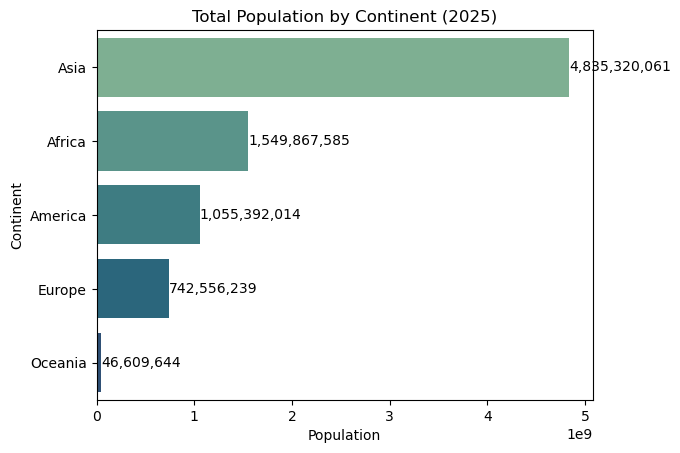

In [32]:
ax = sns.barplot(
    data = continent_pop.reset_index(), 
    x = 'population', 
    y = continent_pop.index,
    hue = 'continent',
    palette='crest'
)

plt.title('Total Population by Continent (2025)')
plt.xlabel('Population')
plt.ylabel('Continent')

for i, v in enumerate(continent_pop['population']):
    ax.text(v, i, f"{v:,.0f}", va = 'center', ha = 'left', fontsize=10)
    
plt.show()

# Asia is approximately 4 times more populated than Africa. 

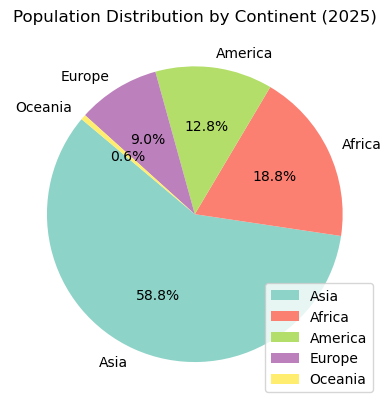

In [41]:
continent_pop.plot(
    kind = 'pie', autopct = '%1.1f%%', startangle = 140, cmap = 'Set3', subplots = True
)
plt.ylabel('')
plt.title('Population Distribution by Continent (2025)')
plt.show()

# this is  pretty much self explanatory

In [33]:
df.groupby('continent')['median_age'].median()

continent
Africa     19.15
America    35.75
Asia       30.40
Europe     42.80
Oceania    28.10
Name: median_age, dtype: float64

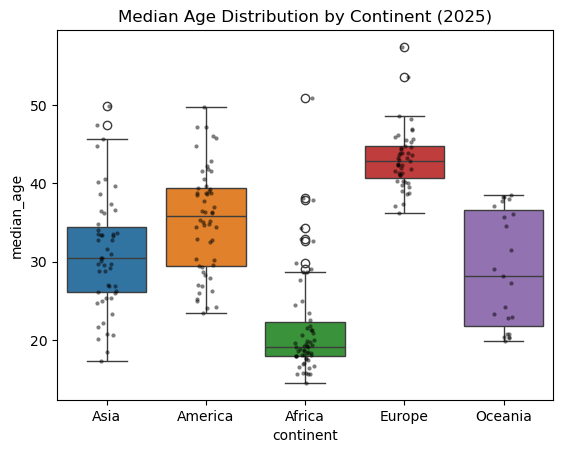

In [47]:
sns.boxplot(data = df, 
           x = 'continent', 
           y = 'median_age', 
           hue = 'continent')

sns.stripplot(
    data = df,
    x = "continent",
    y = "median_age",
    color = "black",
    size = 3,
    alpha = 0.5
)
plt.title('Median Age Distribution by Continent (2025)')

plt.show()

# There are clear differences in age distributions across continents.

# Africa stands out with a much younger population, with some outliers.

# Europe shows the oldest population structure, highlighting its aging demographics.

# The rest sit in between, but with wider variation across countries.

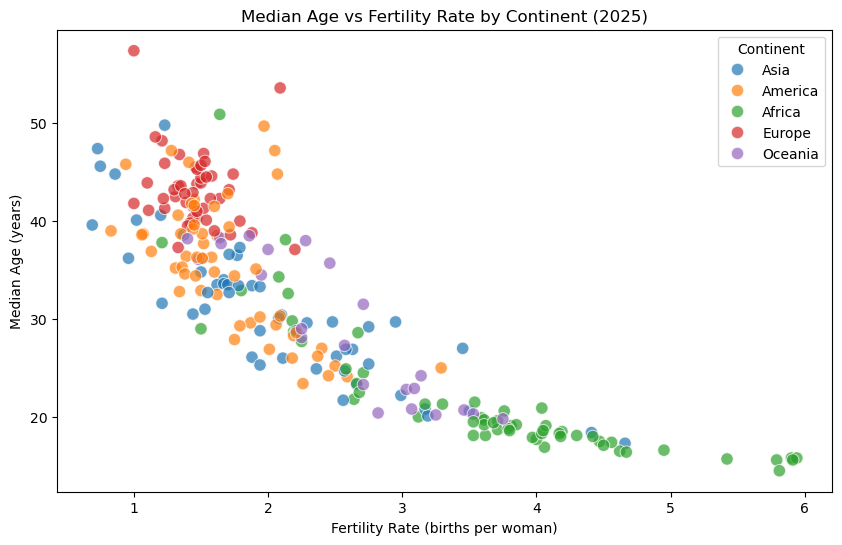

In [50]:
plt.figure(figsize=(10,6))

sns.scatterplot(
    data=df,
    x='fert_rate',
    y='median_age',
    hue='continent',
    alpha=0.7,
    s=80,
    edgecolor='w'
)

plt.title('Median Age vs Fertility Rate by Continent (2025)')
plt.xlabel('Fertility Rate (births per woman)')
plt.ylabel('Median Age (years)')
plt.legend(title='Continent')
plt.show()


# Countries with high fertility rate tend to have younger populations, while those with low fertility rate are older. 

  # This clearly shown in this plots for Africa and Europe, Africa countries cluster in the bottom right having high fertility rate resulting in
  # a low median age (Nigeria as an example), while Europe countries cluster in the top left having low fertility rates resulting in a high median age

In [59]:
top_density = df.sort_values(by = 'density', ascending = False).head(10)
top_density

,country,population,yearly_change,net_change,density,land_area,migrants,fert_rate,median_age,urban_pop,world share,continent
#,,,,,,,,,,,,
216,Monaco,38341,-0.75,-290,25732,1,100,2.09,53.6,NaN,0.00047,Europe
167,Macao,722007,0.24,1745,24067,30,-328,0.69,39.6,97.1,0.00880,Asia
115,Singapore,5870750,0.66,38363,8387,700,16892,0.96,36.2,NaN,0.07100,Asia
106,Hong Kong,7396076,-0.25,-18833,7044,1050,17863,0.73,47.4,NaN,0.09000,Asia
214,Gibraltar,40126,2.03,797,4013,10,549,1.88,38.8,88.5,0.00049,Europe
153,Bahrain,1643332,2.26,36283,2162,760,18128,1.78,33.4,NaN,0.02000,Asia
173,Maldives,529676,0.36,1877,1766,300,-2283,1.55,32.7,39.6,0.00640,Asia
172,Malta,545405,1.07,5798,1704,320,5161,1.11,41.1,76.5,0.00660,Europe
8,Bangladesh,175686899,1.22,2124535,1350,130170,-402100,2.11,26.0,42.6,2.13000,Asia


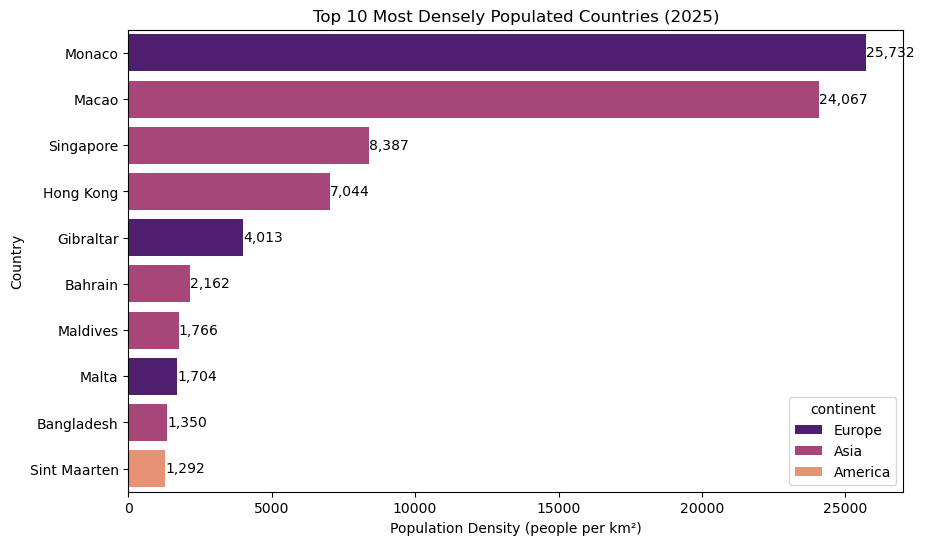

In [94]:


plt.figure(figsize=(10,6))
sns.barplot(
    data= top_density,
    x='density',
    y='country',
    palette='magma', 
    hue = 'continent'
)

plt.title('Top 10 Most Densely Populated Countries (2025)')
plt.xlabel('Population Density (people per km²)')
plt.ylabel('Country')

for i, v in enumerate(top_density['density']):
    plt.text(v, i, f"{v:,.0f}", va='center', ha='left')


plt.show()

# This plot was made to see how tightly packed some countries are relative to their land area.

  # It shows places like Monaco and Singapore rank highest, meaning their populations are concentrated in very small spaces.

    # The takeaway is that these countries face pressures compared to large, low-density countries, 
       
      # density can drive housing and resource challenges.


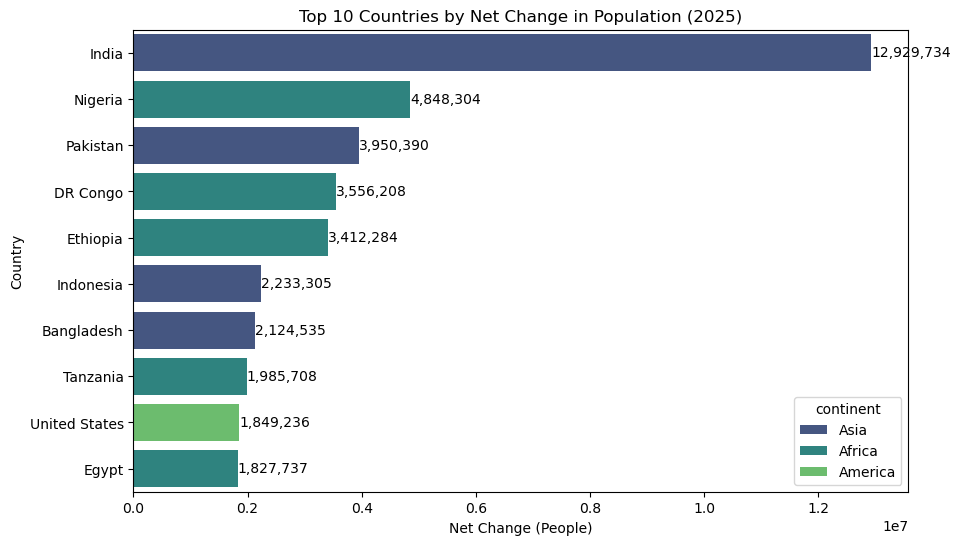

In [93]:
top10_net = df.sort_values(by = 'net_change', ascending = False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(
    data = top10_net, 
    x = 'net_change',
    y = 'country',
    hue = 'continent', 
    palette = 'viridis'
)

plt.title('Top 10 Countries by Net Change in Population (2025)')
plt.xlabel('Net Change (People)')
plt.ylabel('Country')

for i, v in enumerate(top10_net['net_change']):
    plt.text(v, i, f"{v:,.0f}", va='center', ha='left')


plt.show()

# The absolute increase or decrease in population (number of people added or lost in a year).
# As expected India and Nigeria are at the top (high fertility rate).

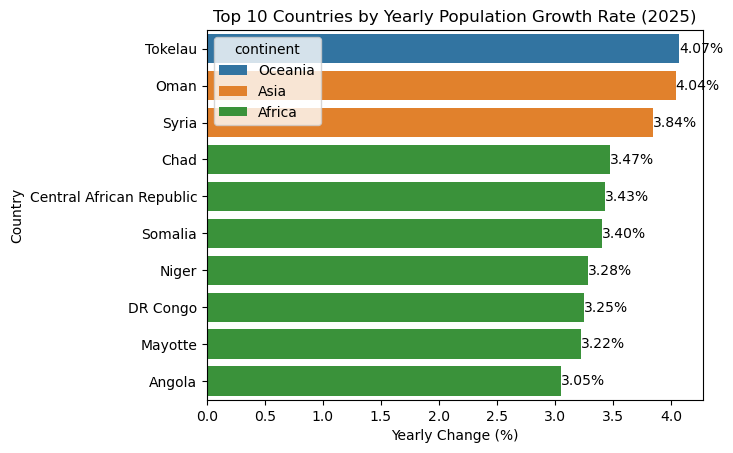

In [95]:
top10_yearly = df.sort_values(by = 'yearly_change', ascending = False).head(10)

sns.barplot(
    data = top10_yearly, 
    x = 'yearly_change', 
    y = 'country',
    hue = 'continent'
)

plt.title('Top 10 Countries by Yearly Population Growth Rate (2025)')
plt.xlabel('Yearly Change (%)')
plt.ylabel('Country')

for i, v in enumerate(top10_yearly['yearly_change']):
    plt.text(v, i, f"{v:.2f}%", va='center', ha='left')

plt.show()

In [105]:
df.iloc[230] # Tokelau informations

country           Tokelau
population           2608
yearly_change        4.07
net_change            102
density               261
land_area              10
migrants               53
fert_rate            2.57
median_age           27.3
urban_pop             NaN
world share      0.000032
continent         Oceania
Name: 231, dtype: object